# Data Science Case 1: Design Service - Classification

__Content__:
<br>
- Part 1: EDA - Load the dataset and take a quick look
<br> 
- Part 2: Data Cleaning - Replace na with unknown for categorical variables and with zero for numerical variables
<br>
- Part 3: Data Visualization - Visualize the X variables and y variable and notice the imbalancement of y
<br>
- Part 4: Feature Engineering - Split dataset into training (to train the model) and test sets (to test the model); one hot encoding on categorical variables; Upsample with SMOTE and downsample with random sampling the datasets to get prepared for different models
<br>
- Part 5: Modeling - Compare different classification models on their performance (f1, ROC_AUC, accuracy, training time); pick the best one and do grid search with cross validation to tune hyper parameters to optimize
<br>
- Part 6: Summary - Business strategy recommendation

## Part 1. EDA

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors
from importlib import reload #for dev
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# import data
df = pd.read_csv('design_services_dataset_wB1.csv')

In [3]:
df.head()

,customer_id,num_items_list,num_lists,avg_session_length,InMarketscore,geos,Avg_brand_pages_viewed,Avg_design_classes_per_session,HolidayShoppers,Avg_SuperBrowse_Pages_per_session,...,Avg_Shop_the_look_sess_With_DSRoom,AvgPDPInfoInteractionPerSession,Avg_RoomPlanner_session,Max_Design_services_ATC_perSession,Avg_STLPage_per_Session,AvgPDPInteraction,AvgDSRelevantClasses,AvgDSRelevantProducts,avg_category_pages_per_session,DS_customer_flag
0,583266,1,0.0,687.680478,NaN,Rural,NaN,NaN,0,0.000000,...,NaN,NaN,0.000000,4.0,0.0,NaN,0.0,NaN,0.129386,0
1,507698,1,2.0,1066.967614,NaN,Rural,NaN,NaN,0,0.000000,...,NaN,NaN,0.037361,6.0,0.0,NaN,NaN,1.0,0.166618,0
2,889449,1,0.0,2097.104262,NaN,NaN,NaN,NaN,0,0.000000,...,NaN,0.4,0.000193,7.0,0.0,NaN,1.0,1.0,0.296956,0
3,477756,2,0.0,64.789735,NaN,NaN,NaN,NaN,0,0.333333,...,NaN,NaN,0.133602,2.0,0.0,NaN,4.0,4.0,0.126711,0
4,557413,0,2.0,853.492792,NaN,NaN,NaN,NaN,0,30.500000,...,NaN,NaN,0.000000,NaN,0.0,NaN,0.0,1.0,0.420142,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1166192 entries, 0 to 1166191
Data columns (total 24 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   customer_id                         1166192 non-null  int64  
 1   num_items_list                      1166192 non-null  int64  
 2   num_lists                           1066734 non-null  float64
 3   avg_session_length                  1166192 non-null  float64
 4   InMarketscore                       202981 non-null   float64
 5   geos                                566869 non-null   object 
 6   Avg_brand_pages_viewed              22765 non-null    float64
 7   Avg_design_classes_per_session      156731 non-null   float64
 8   HolidayShoppers                     1166192 non-null  int64  
 9   Avg_SuperBrowse_Pages_per_session   1087733 non-null  float64
 10  Visitor_type                        1166192 non-null  object 
 11  life_style_

In [5]:
df.isnull().sum() #checking for total null values

customer_id                                 0
num_items_list                              0
num_lists                               99458
avg_session_length                          0
InMarketscore                          963211
geos                                   599323
Avg_brand_pages_viewed                1143427
Avg_design_classes_per_session        1009461
HolidayShoppers                             0
Avg_SuperBrowse_Pages_per_session       78459
Visitor_type                                0
life_style_brand_user                  963848
gender                                 134113
AvgDailySalesPagesViewedPerSession     109451
Avg_Shop_the_look_sess_With_DSRoom     906606
AvgPDPInfoInteractionPerSession        532017
Avg_RoomPlanner_session                     0
Max_Design_services_ATC_perSession      97251
Avg_STLPage_per_Session                     0
AvgPDPInteraction                      662310
AvgDSRelevantClasses                   173484
AvgDSRelevantProducts             

## Part 2. Data Cleaning

In [6]:
# Fill in NA - replace NA of gender and geos to be unknown
df["gender"] = df["gender"].replace(np.nan,'Unknown')
print(df.gender.value_counts())

df["geos"] = df["geos"].replace(np.nan,'Unknown')
print(df.geos.value_counts())

Female     901466
Unknown    134113
Male       130613
Name: gender, dtype: int64
Unknown     599323
Urban       263946
Suburban    166127
Rural       136796
Name: geos, dtype: int64


In [7]:
numerical = [
  'num_items_list', 'num_lists', 'avg_session_length', 'InMarketscore', 'Avg_brand_pages_viewed', 'Avg_design_classes_per_session', 'Avg_SuperBrowse_Pages_per_session'
    ,'AvgDailySalesPagesViewedPerSession','Avg_Shop_the_look_sess_With_DSRoom','AvgPDPInfoInteractionPerSession','Avg_RoomPlanner_session','Max_Design_services_ATC_perSession',
    'Avg_STLPage_per_Session','AvgPDPInteraction','AvgDSRelevantClasses','AvgDSRelevantProducts','avg_category_pages_per_session'
]
categorical = [
  'geos', 'HolidayShoppers', 'Visitor_type', 'life_style_brand_user', 'gender'
]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1166192 entries, 0 to 1166191
Data columns (total 24 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   customer_id                         1166192 non-null  int64  
 1   num_items_list                      1166192 non-null  int64  
 2   num_lists                           1066734 non-null  float64
 3   avg_session_length                  1166192 non-null  float64
 4   InMarketscore                       202981 non-null   float64
 5   geos                                1166192 non-null  object 
 6   Avg_brand_pages_viewed              22765 non-null    float64
 7   Avg_design_classes_per_session      156731 non-null   float64
 8   HolidayShoppers                     1166192 non-null  int64  
 9   Avg_SuperBrowse_Pages_per_session   1087733 non-null  float64
 10  Visitor_type                        1166192 non-null  object 
 11  life_style_

In [10]:
# replace NA with zero for all the numerical variables and lifestylebranduser
df[numerical] = df[numerical].fillna(0)
df['life_style_brand_user']=df['life_style_brand_user'].fillna(0)
#df['life_style_brand_user'] = df['life_style_brand_user'].astype('object')

In [11]:
df.isnull().sum() #checking for total null values

customer_id                           0
num_items_list                        0
num_lists                             0
avg_session_length                    0
InMarketscore                         0
geos                                  0
Avg_brand_pages_viewed                0
Avg_design_classes_per_session        0
HolidayShoppers                       0
Avg_SuperBrowse_Pages_per_session     0
Visitor_type                          0
life_style_brand_user                 0
gender                                0
AvgDailySalesPagesViewedPerSession    0
Avg_Shop_the_look_sess_With_DSRoom    0
AvgPDPInfoInteractionPerSession       0
Avg_RoomPlanner_session               0
Max_Design_services_ATC_perSession    0
Avg_STLPage_per_Session               0
AvgPDPInteraction                     0
AvgDSRelevantClasses                  0
AvgDSRelevantProducts                 0
avg_category_pages_per_session        0
DS_customer_flag                      0
dtype: int64

## Part 3. Data Visualization

<AxesSubplot:>

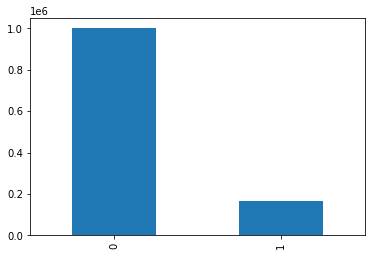

In [14]:
df.DS_customer_flag.value_counts().plot(kind='bar') # distribution of Y variable

array([[<AxesSubplot:title={'center':'num_items_list'}>,
        <AxesSubplot:title={'center':'num_lists'}>,
        <AxesSubplot:title={'center':'avg_session_length'}>],
       [<AxesSubplot:title={'center':'InMarketscore'}>,
        <AxesSubplot:title={'center':'Avg_brand_pages_viewed'}>,
        <AxesSubplot:title={'center':'Avg_design_classes_per_session'}>],
       [<AxesSubplot:title={'center':'Avg_SuperBrowse_Pages_per_session'}>,
        <AxesSubplot:title={'center':'AvgDailySalesPagesViewedPerSession'}>,
        <AxesSubplot:title={'center':'Avg_Shop_the_look_sess_With_DSRoom'}>],
       [<AxesSubplot:title={'center':'AvgPDPInfoInteractionPerSession'}>,
        <AxesSubplot:title={'center':'Avg_RoomPlanner_session'}>,
        <AxesSubplot:title={'center':'Max_Design_services_ATC_perSession'}>],
       [<AxesSubplot:title={'center':'Avg_STLPage_per_Session'}>,
        <AxesSubplot:title={'center':'AvgPDPInteraction'}>,
        <AxesSubplot:title={'center':'AvgDSRelevantClasses'

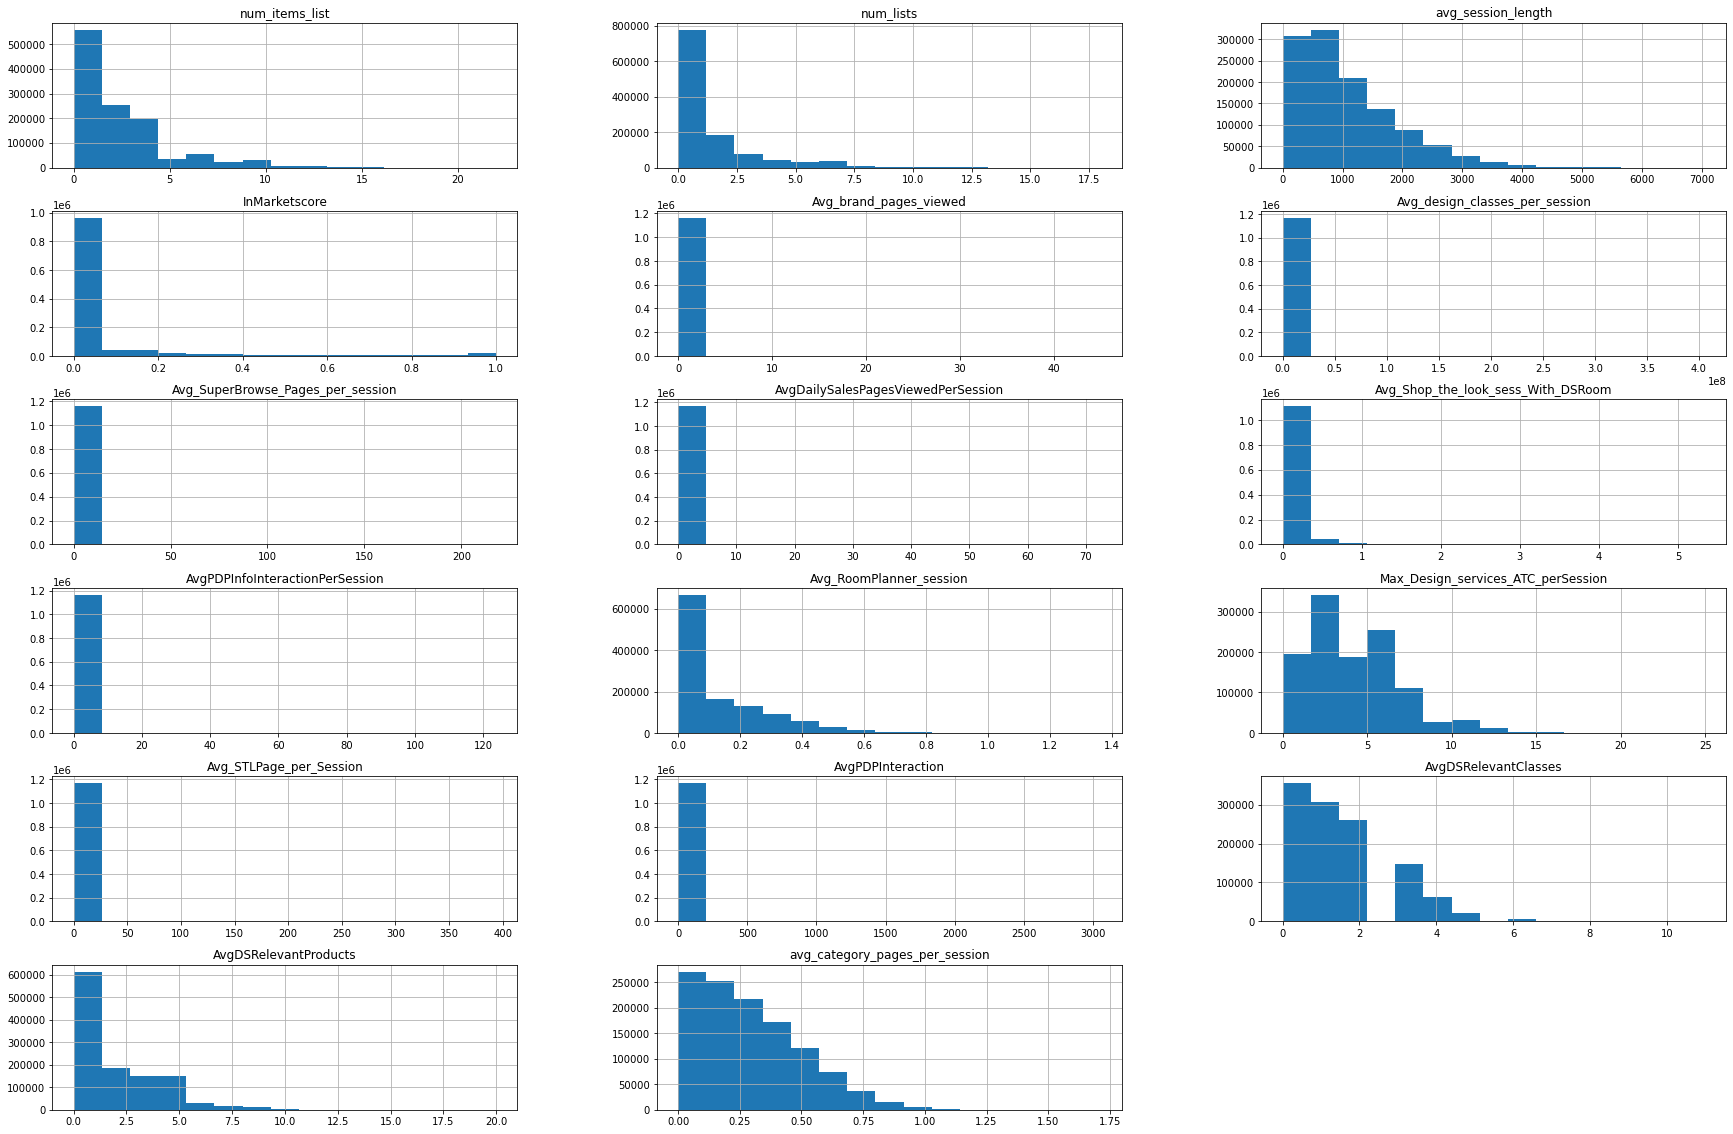

In [15]:
df[numerical].hist(bins=15, figsize=(30, 20), layout=(6, 3))

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

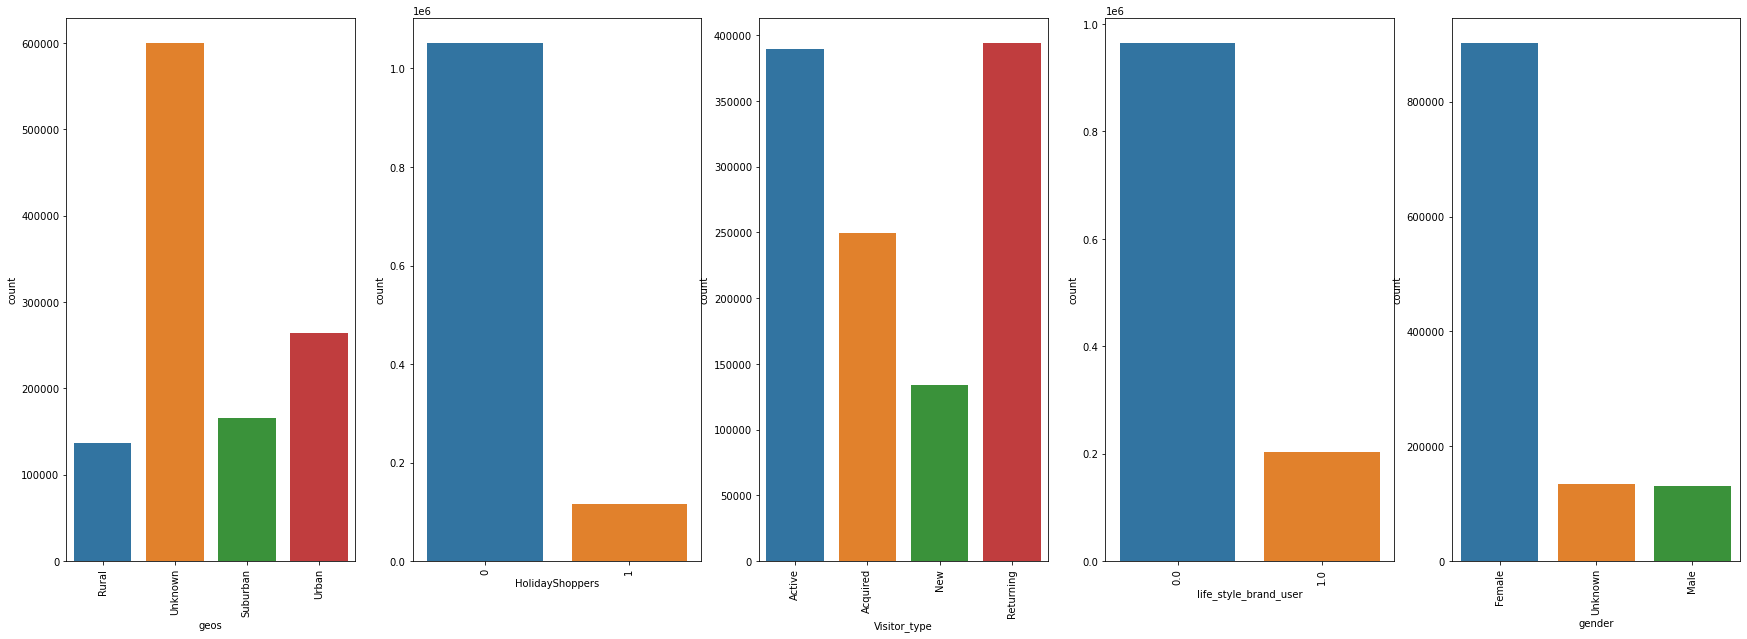

In [16]:
fig, ax = plt.subplots(1, 5, figsize=(30, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

## Part 4. Feature Engineering

In [12]:
X = pd.concat([df[numerical],df[categorical]],axis=1)
X.head()

,num_items_list,num_lists,avg_session_length,InMarketscore,Avg_brand_pages_viewed,Avg_design_classes_per_session,Avg_SuperBrowse_Pages_per_session,AvgDailySalesPagesViewedPerSession,Avg_Shop_the_look_sess_With_DSRoom,AvgPDPInfoInteractionPerSession,...,Avg_STLPage_per_Session,AvgPDPInteraction,AvgDSRelevantClasses,AvgDSRelevantProducts,avg_category_pages_per_session,geos,HolidayShoppers,Visitor_type,life_style_brand_user,gender
0,1,0.0,687.680478,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.129386,Rural,0,Active,0.0,Female
1,1,2.0,1066.967614,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.166618,Rural,0,Active,0.0,Female
2,1,0.0,2097.104262,0.0,0.0,0.0,0.000000,0.0,0.0,0.4,...,0.0,0.0,1.0,1.0,0.296956,Unknown,0,Acquired,1.0,Female
3,2,0.0,64.789735,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,...,0.0,0.0,4.0,4.0,0.126711,Unknown,0,New,0.0,Unknown
4,0,2.0,853.492792,0.0,0.0,0.0,30.500000,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.420142,Unknown,0,Returning,0.0,Female


In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1166192 entries, 0 to 1166191
Data columns (total 22 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   num_items_list                      1166192 non-null  int64  
 1   num_lists                           1166192 non-null  float64
 2   avg_session_length                  1166192 non-null  float64
 3   InMarketscore                       1166192 non-null  float64
 4   Avg_brand_pages_viewed              1166192 non-null  float64
 5   Avg_design_classes_per_session      1166192 non-null  float64
 6   Avg_SuperBrowse_Pages_per_session   1166192 non-null  float64
 7   AvgDailySalesPagesViewedPerSession  1166192 non-null  float64
 8   Avg_Shop_the_look_sess_With_DSRoom  1166192 non-null  float64
 9   AvgPDPInfoInteractionPerSession     1166192 non-null  float64
 10  Avg_RoomPlanner_session             1166192 non-null  float64
 11  Max_Design_

In [14]:
y = df['DS_customer_flag']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: DS_customer_flag, dtype: int64

In [15]:
# split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=24)

In [16]:
print('X_train shape:',X_train.shape)

X_train shape: (781348, 22)


In [17]:
categorical = [
  'geos', 'Visitor_type', 'gender'
]
#'HolidayShoppers' and 'life_style_brand_user' only have 2 unique values, no need to be operated one hot encoding on

In [18]:
X_train[['HolidayShoppers','life_style_brand_user']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 781348 entries, 1118339 to 242082
Data columns (total 2 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   HolidayShoppers        781348 non-null  int64  
 1   life_style_brand_user  781348 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 17.9 MB


In [19]:
# one hot encoding the categorical variables both in train and test based on the train test (to avoid data leakage)
from sklearn.preprocessing import OneHotEncoder

X_train_categorical=X_train[categorical]
X_test_categorical=X_test[categorical]
enc = OneHotEncoder(handle_unknown = 'ignore')
enc.fit(X_train_categorical)

X_train_categorical_ohe = pd.DataFrame(enc.transform(X_train_categorical).toarray(),
                                       columns=enc.get_feature_names_out(['geos','Visitor_type','gender']),
                                       index=X_train_categorical.index)
X_train_ohe = pd.concat([X_train[numerical],X_train_categorical_ohe,X_train[['HolidayShoppers','life_style_brand_user']]],axis=1)

X_test_categorical_ohe = pd.DataFrame(enc.transform(X_test_categorical).toarray(),
                                      columns=enc.get_feature_names_out(['geos','Visitor_type','gender']),
                                      index=X_test_categorical.index)
X_test_ohe = pd.concat([X_test[numerical],X_test_categorical_ohe,X_test[['HolidayShoppers','life_style_brand_user']]],axis=1)

In [20]:
X_train_ohe.head()

,num_items_list,num_lists,avg_session_length,InMarketscore,Avg_brand_pages_viewed,Avg_design_classes_per_session,Avg_SuperBrowse_Pages_per_session,AvgDailySalesPagesViewedPerSession,Avg_Shop_the_look_sess_With_DSRoom,AvgPDPInfoInteractionPerSession,...,geos_Urban,Visitor_type_Acquired,Visitor_type_Active,Visitor_type_New,Visitor_type_Returning,gender_Female,gender_Male,gender_Unknown,HolidayShoppers,life_style_brand_user
1118339,3,0.0,458.897659,0.000000,0.0,0.00,4.5,0.0,0.000000,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1.0
1055958,1,0.0,1312.430056,0.295549,0.0,303643.25,0.0,0.0,0.014103,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0.0
981102,1,1.0,2786.317351,0.000000,0.0,0.00,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0.0
414256,11,4.0,573.095168,0.000000,0.0,0.00,12.0,0.0,0.000000,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,0.0
126433,2,0.0,1228.155150,0.000000,0.0,0.00,0.0,0.0,0.380495,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0.0


In [21]:
# categorical = enc.get_feature_names_out(['geos','Visitor_type','gender'])
# X_train_ohe[categorical] = X_train_ohe[categorical].astype('object')
# X_test_ohe[categorical] = X_test_ohe[categorical].astype('object')
X_train_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 781348 entries, 1118339 to 242082
Data columns (total 30 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   num_items_list                      781348 non-null  int64  
 1   num_lists                           781348 non-null  float64
 2   avg_session_length                  781348 non-null  float64
 3   InMarketscore                       781348 non-null  float64
 4   Avg_brand_pages_viewed              781348 non-null  float64
 5   Avg_design_classes_per_session      781348 non-null  float64
 6   Avg_SuperBrowse_Pages_per_session   781348 non-null  float64
 7   AvgDailySalesPagesViewedPerSession  781348 non-null  float64
 8   Avg_Shop_the_look_sess_With_DSRoom  781348 non-null  float64
 9   AvgPDPInfoInteractionPerSession     781348 non-null  float64
 10  Avg_RoomPlanner_session             781348 non-null  float64
 11  Max_Design_services_

In [22]:
# Transform the categorical variables into dummy variables: get_dummies is not good b/c it cannot achieve consistency across training and test data, thus not used here
#df_dummies = pd.get_dummies(df[categorical])

In [23]:
# Deal with the imbalanced Y
#!pip install imblearn

In [24]:
# Method 1: Up sample minority class - SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_train_ohe_sm, y_train_sm = smote.fit_resample(X_train_ohe, y_train)

In [25]:
# plot 2-dimensional
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l].iloc[:,0],
            X[y==l].iloc[:,1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [26]:
y_train.value_counts()

0    669963
1    111385
Name: DS_customer_flag, dtype: int64

In [27]:
y_train_sm.value_counts()

0    669963
1    669963
Name: DS_customer_flag, dtype: int64

In [28]:
X_train_ohe_sm.shape

(1339926, 30)

In [29]:
#plot_2d_space(X_train_ohe_sm, y_train_sm, 'SMOTE over-sampling')

Major class:  669963
Minor class:  111385
New Major class:  111385


<AxesSubplot:title={'center':'DS customer or not'}>

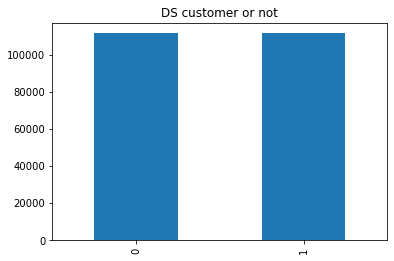

In [30]:
# Method 2: Down sample majority class - Tomelinks - too long to run, give up
# Method 3: Random down sample

train_data = pd.concat([X_train_ohe,y_train],axis=1)
# Get the number of each class
major_class = train_data[train_data["DS_customer_flag"]==0]
minor_class = train_data[train_data["DS_customer_flag"]==1]
print("Major class: ",major_class.shape[0])
print("Minor class: ",minor_class.shape[0])

# Down sample major class
down_sample = major_class.sample(n=minor_class.shape[0])
print("New Major class: ", down_sample.shape[0])

# Combine them to get the balanced data
balanced_1 = pd.concat([down_sample,minor_class]).reset_index(drop=True)

# Check if "Survived" is a balanced class now
balanced_1.DS_customer_flag.value_counts().plot(kind='bar', title='DS customer or not')

In [31]:
y_train_down = balanced_1['DS_customer_flag']
X_train_ohe_down = balanced_1.drop(['DS_customer_flag'], axis=1)

In [32]:
X_train_ohe_down.shape

(222770, 30)

## Part 5. Modeling

Methodology: try out as many classifiers as possible; compare their performance on the test set; pick the top one and do grid search with cross validation to tune hyper parameters to optimize

### Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, f1_score, roc_auc_score
import time

start = time.time()

lr = LogisticRegression()
lr.fit(X_train_ohe_sm,y_train_sm)

y_prediction = lr.predict(X_test_ohe)
accuracy = accuracy_score(y_test,y_prediction)
precision = precision_score(y_test,y_prediction)
f1 = f1_score(y_test,y_prediction)
roc_auc = roc_auc_score(y_test,y_prediction)
Report = classification_report(y_test,y_prediction)

end = time.time()

models_scores_table = pd.DataFrame({'Logistic Regression':[accuracy, precision, f1, roc_auc,end-start]},
                                   index=['accuracy', 'precision', 'f1', 'roc_auc', 'time'])

print("Logistic Regression Report: \n", Report)
print(models_scores_table.head())

Logistic Regression Report: 
               precision    recall  f1-score   support

           0       0.99      0.77      0.87    330037
           1       0.41      0.95      0.57     54807

    accuracy                           0.80    384844
   macro avg       0.70      0.86      0.72    384844
weighted avg       0.91      0.80      0.83    384844

           Logistic Regression
accuracy              0.798635
precision             0.410868
f1                    0.574382
roc_auc               0.863449
time                 25.538181


### k-NN

In [34]:
#!pip install jupyterlab_execute_time

In [35]:
# normalize (min-max standardize) the train data and test data for kNN and Neural Network usage
from sklearn import neighbors, datasets
# Standardize features by removing the mean and scaling to unit variance
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_train_ohe_down_minmax = min_max_scaler.fit_transform(X_train_ohe_down)
X_test_ohe_minmax = min_max_scaler.transform(X_test_ohe)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

start = time.time()

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_ohe_down_minmax,y_train_down)

y_prediction = knn.predict(X_test_ohe_minmax)
accuracy = accuracy_score(y_test,y_prediction)
precision = precision_score(y_test,y_prediction)
f1 = f1_score(y_test,y_prediction)
roc_auc = roc_auc_score(y_test,y_prediction)
Report = classification_report(y_test,y_prediction)

end = time.time()

models_scores_table['kNN']=[accuracy, precision, f1, roc_auc, end-start]

print("kNN Report: \n", Report)
print("Latest Model Score Table: \n", models_scores_table.head())

kNN Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    330037
           1       0.92      0.96      0.94     54807

    accuracy                           0.98    384844
   macro avg       0.96      0.97      0.97    384844
weighted avg       0.98      0.98      0.98    384844

Latest Model Score Table: 
            Logistic Regression          kNN
accuracy              0.798635     0.982718
precision             0.410868     0.921932
f1                    0.574382     0.940549
roc_auc               0.863449     0.973217
time                 25.538181  1241.222115


### LGBM

In [38]:
#!pip install lightgbm

In [39]:
import lightgbm as lgb

start = time.time()

lgb = lgb.LGBMClassifier()
lgb.fit(X_train_ohe_sm,y_train_sm)

y_prediction = lgb.predict(X_test_ohe)
accuracy = accuracy_score(y_test,y_prediction)
precision = precision_score(y_test,y_prediction)
f1 = f1_score(y_test,y_prediction)
roc_auc = roc_auc_score(y_test,y_prediction)
Report = classification_report(y_test,y_prediction)

end = time.time()

models_scores_table['LGBM']=[accuracy, precision, f1, roc_auc, end-start]

print("LGBM Report: \n", Report)
print("Latest Model Score Table: \n", models_scores_table.head())

LGBM Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99    330037
           1       0.97      0.97      0.97     54807

    accuracy                           0.99    384844
   macro avg       0.98      0.98      0.98    384844
weighted avg       0.99      0.99      0.99    384844

Latest Model Score Table: 
            Logistic Regression          kNN       LGBM
accuracy              0.798635     0.982718   0.991306
precision             0.410868     0.921932   0.972215
f1                    0.574382     0.940549   0.969386
roc_auc               0.863449     0.973217   0.980993
time                 25.538181  1241.222115  12.138561


### Ensemble Methods

In [40]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

start = time.time()

rf = RandomForestClassifier(max_depth=5, random_state=0)
rf.fit(X_train_ohe_down_minmax,y_train_down)

y_prediction = rf.predict(X_test_ohe_minmax)
accuracy = accuracy_score(y_test,y_prediction)
precision = precision_score(y_test,y_prediction)
f1 = f1_score(y_test,y_prediction)
roc_auc = roc_auc_score(y_test,y_prediction)
Report = classification_report(y_test,y_prediction)

end = time.time()

models_scores_table['Random Forest']=[accuracy, precision, f1, roc_auc, end-start]

print("Random Forest Report: \n", Report)
print("Latest Model Score Table: \n", models_scores_table.head())

Random Forest Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    330037
           1       0.91      0.98      0.94     54807

    accuracy                           0.98    384844
   macro avg       0.95      0.98      0.96    384844
weighted avg       0.98      0.98      0.98    384844

Latest Model Score Table: 
            Logistic Regression          kNN       LGBM  Random Forest
accuracy              0.798635     0.982718   0.991306       0.982289
precision             0.410868     0.921932   0.972215       0.905268
f1                    0.574382     0.940549   0.969386       0.940219
roc_auc               0.863449     0.973217   0.980993       0.980491
time                 25.538181  1241.222115  12.138561      18.790537


In [41]:
#!pip install xgboost

In [42]:
# XGBoost
from xgboost import XGBClassifier, plot_importance

start = time.time()

xgbc = XGBClassifier(max_depth=5, learning_rate=0.1, n_estimators=100, seed=10)
xgbc.fit(X_train_ohe_down_minmax,y_train_down)

y_prediction = xgbc.predict(X_test_ohe_minmax)
accuracy = accuracy_score(y_test,y_prediction)
precision = precision_score(y_test,y_prediction)
f1 = f1_score(y_test,y_prediction)
roc_auc = roc_auc_score(y_test,y_prediction)
Report = classification_report(y_test,y_prediction)

end = time.time()

models_scores_table['XGBoost']=[accuracy, precision, f1, roc_auc, end-start]

print("XGBoost Report: \n", Report)
print("Latest Model Score Table: \n", models_scores_table.head())

XGBoost Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    330037
           1       0.93      0.98      0.96     54807

    accuracy                           0.99    384844
   macro avg       0.96      0.99      0.97    384844
weighted avg       0.99      0.99      0.99    384844

Latest Model Score Table: 
            Logistic Regression          kNN       LGBM  Random Forest  \
accuracy              0.798635     0.982718   0.991306       0.982289   
precision             0.410868     0.921932   0.972215       0.905268   
f1                    0.574382     0.940549   0.969386       0.940219   
roc_auc               0.863449     0.973217   0.980993       0.980491   
time                 25.538181  1241.222115  12.138561      18.790537   

             XGBoost  
accuracy    0.986940  
precision   0.929361  
f1          0.955435  
roc_auc     0.985303  
time       21.172579  


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

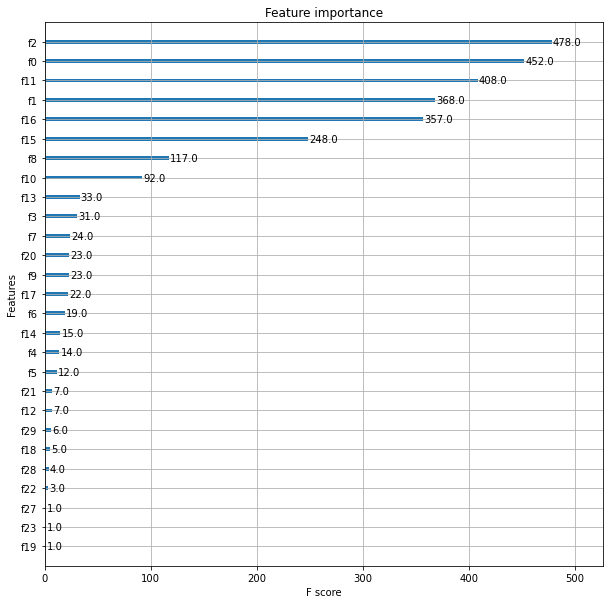

In [43]:
#plt.rcParams["figure.figsize"] = (10,10)
#plot_importance(xgbc)

In [44]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

start = time.time()

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=10)
gb.fit(X_train_ohe_down_minmax,y_train_down)

y_prediction = gb.predict(X_test_ohe_minmax)
accuracy = accuracy_score(y_test,y_prediction)
precision = precision_score(y_test,y_prediction)
f1 = f1_score(y_test,y_prediction)
roc_auc = roc_auc_score(y_test,y_prediction)
Report = classification_report(y_test,y_prediction)

end = time.time()

models_scores_table['Gradient Boosting']=[accuracy, precision, f1, roc_auc, end-start]

print("Gradient Boosting Report: \n", Report)
print("Latest Model Score Table: \n", models_scores_table.head())

Gradient Boosting Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    330037
           1       0.93      0.98      0.95     54807

    accuracy                           0.99    384844
   macro avg       0.96      0.99      0.97    384844
weighted avg       0.99      0.99      0.99    384844

Latest Model Score Table: 
            Logistic Regression          kNN       LGBM  Random Forest  \
accuracy              0.798635     0.982718   0.991306       0.982289   
precision             0.410868     0.921932   0.972215       0.905268   
f1                    0.574382     0.940549   0.969386       0.940219   
roc_auc               0.863449     0.973217   0.980993       0.980491   
time                 25.538181  1241.222115  12.138561      18.790537   

             XGBoost  Gradient Boosting  
accuracy    0.986940           0.986465  
precision   0.929361           0.926129  
f1          0.955435           0.953904  
roc_auc   

### SVM

In [45]:
# standardize the train data and test data for SVM usage
from sklearn.preprocessing import StandardScaler

sc1 = StandardScaler()
sc1.fit(X_train_ohe_down)
X_train_ohe_down_std=sc1.transform(X_train_ohe_down)
X_test_ohe_std=sc1.transform(X_test_ohe)

In [46]:
# SVM
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train_ohe_down_std,y_train_down)

start = time.time()

y_prediction = svm.predict(X_test_ohe_std)
accuracy = accuracy_score(y_test,y_prediction)
precision = precision_score(y_test,y_prediction)
f1 = f1_score(y_test,y_prediction)
roc_auc = roc_auc_score(y_test,y_prediction)
Report = classification_report(y_test,y_prediction)

end = time.time()

models_scores_table['SVM']=[accuracy, precision, f1, roc_auc, end-start]

print("SVM Report: \n", Report)
print("Latest Model Score Table: \n", models_scores_table.head())

SVM Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    330037
           1       0.92      0.98      0.95     54807

    accuracy                           0.98    384844
   macro avg       0.96      0.98      0.97    384844
weighted avg       0.99      0.98      0.99    384844

Latest Model Score Table: 
            Logistic Regression          kNN       LGBM  Random Forest  \
accuracy              0.798635     0.982718   0.991306       0.982289   
precision             0.410868     0.921932   0.972215       0.905268   
f1                    0.574382     0.940549   0.969386       0.940219   
roc_auc               0.863449     0.973217   0.980993       0.980491   
time                 25.538181  1241.222115  12.138561      18.790537   

             XGBoost  Gradient Boosting         SVM  
accuracy    0.986940           0.986465    0.984986  
precision   0.929361           0.926129    0.919805  
f1          0.955435          

SVM is too slow to run (~3.5h) - maybe try downsample in the future.

### Decision Tree

In [53]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

start = time.time()

dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train_ohe_sm,y_train_sm)

y_prediction = dt.predict(X_test_ohe)
accuracy = accuracy_score(y_test,y_prediction)
precision = precision_score(y_test,y_prediction)
f1 = f1_score(y_test,y_prediction)
roc_auc = roc_auc_score(y_test,y_prediction)
Report = classification_report(y_test,y_prediction)

end = time.time()

models_scores_table['Decision Tree']=[accuracy, precision, f1, roc_auc, end-start]

print("Decision Tree Report: \n", Report)
print("Latest Model Score Table: \n", models_scores_table.head())

Decision Tree Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    330037
           1       0.94      0.95      0.94     54807

    accuracy                           0.98    384844
   macro avg       0.96      0.97      0.97    384844
weighted avg       0.98      0.98      0.98    384844

Latest Model Score Table: 
            Logistic Regression          kNN       LGBM  Random Forest  \
accuracy              0.798635     0.982718   0.991306       0.982289   
precision             0.410868     0.921932   0.972215       0.905268   
f1                    0.574382     0.940549   0.969386       0.940219   
roc_auc               0.863449     0.973217   0.980993       0.980491   
time                 25.538181  1241.222115  12.138561      18.790537   

             XGBoost  Gradient Boosting         SVM  Decision Tree  \
accuracy    0.986940           0.986465    0.984986       0.984001   
precision   0.929361           0.926129   

### Neural Network

In [54]:
# normalize (min-max standardize) the train data and test data for kNN and Neural Network usage

min_max_scaler = preprocessing.MinMaxScaler()
X_train_ohe_sm_minmax = min_max_scaler.fit_transform(X_train_ohe_sm)
X_test_ohe_minmax = min_max_scaler.transform(X_test_ohe)

In [55]:
# Neural Network
from sklearn.neural_network import MLPClassifier

start = time.time()

nn = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
nn.fit(X_train_ohe_sm_minmax,y_train_sm)

y_prediction = nn.predict(X_test_ohe_minmax)
accuracy = accuracy_score(y_test,y_prediction)
precision = precision_score(y_test,y_prediction)
f1 = f1_score(y_test,y_prediction)
roc_auc = roc_auc_score(y_test,y_prediction)
Report = classification_report(y_test,y_prediction)

end = time.time()

models_scores_table['Neural Network']=[accuracy, precision, f1, roc_auc, end-start]

print("Neural Network Report: \n", Report)
print("Latest Model Score Table: \n", models_scores_table.head())



Neural Network Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    330037
           1       0.96      0.95      0.96     54807

    accuracy                           0.99    384844
   macro avg       0.98      0.97      0.97    384844
weighted avg       0.99      0.99      0.99    384844

Latest Model Score Table: 
            Logistic Regression          kNN       LGBM  Random Forest  \
accuracy              0.798635     0.982718   0.991306       0.982289   
precision             0.410868     0.921932   0.972215       0.905268   
f1                    0.574382     0.940549   0.969386       0.940219   
roc_auc               0.863449     0.973217   0.980993       0.980491   
time                 25.538181  1241.222115  12.138561      18.790537   

             XGBoost  Gradient Boosting         SVM  Decision Tree  \
accuracy    0.986940           0.986465    0.984986       0.984001   
precision   0.929361           0.926129  

### Hyperparameter tuning for the best model - LGBM

In [33]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV  # Perforing grid search

In [34]:
parameters = {
    'learning_rate': [0.05,0.1,0.15],
    'num_leaves': [15,31,60],
    'n_estimators': [50,100,150]
}

gbm = lgb.LGBMClassifier(objective='binary', 
                          n_jobs=-1
                          #is_unbalance=True, 
                          #num_threads=8, 
                          #two_round=True,
                          #bagging_fraction=0.9,
                          #bagging_freq=8,
                          #metric = 'roc_auc',
                          #verbose = 0,
                          #boosting_type='gbdt',
                          #feature_fraction=0.8,
                          #learning_rate=0.1,
                          #min_child_samples=10,
                          #min_child_weight=5,
                          #min_data_in_leaf=20,
                          #min_split_gain=0.0,
                          #n_estimators=10,
                          #num_leaves=80,
                          #reg_alpha=0.0,
                          #reg_lambda=0.0,
                          #subsample=1.0,
                          #lambda_l1= 0.6,
                          #lambda_l2= 0,
                          #cat_smooth= 35,
                          #force_row_wise='true',
                          #max_dept=24
                        )
gsearch = GridSearchCV(gbm, param_grid=parameters, scoring='f1', cv=3)
gsearch.fit(X_train_ohe_sm,y_train_sm)

print('best parameter:{0}'.format(gsearch.best_params_))
print('best roc_auc:{0}'.format(gsearch.best_score_))
print(gsearch.cv_results_['mean_test_score'])
print(gsearch.cv_results_['params'])

best parameter:{'learning_rate': 0.1, 'n_estimators': 50, 'num_leaves': 60}
best roc_auc:0.9911978010474378
[0.98427026 0.98738212 0.9892893  0.9892088  0.99060852 0.99117984
 0.99049059 0.9903892  0.98989254 0.98913971 0.99071125 0.9911978
 0.98924554 0.98824338 0.98728332 0.98469546 0.98281563 0.98230651
 0.99038973 0.99037174 0.98970219 0.98466172 0.98233109 0.98232472
 0.97790484 0.97738729 0.97841799]
[{'learning_rate': 0.05, 'n_estimators': 50, 'num_leaves': 15}, {'learning_rate': 0.05, 'n_estimators': 50, 'num_leaves': 31}, {'learning_rate': 0.05, 'n_estimators': 50, 'num_leaves': 60}, {'learning_rate': 0.05, 'n_estimators': 100, 'num_leaves': 15}, {'learning_rate': 0.05, 'n_estimators': 100, 'num_leaves': 31}, {'learning_rate': 0.05, 'n_estimators': 100, 'num_leaves': 60}, {'learning_rate': 0.05, 'n_estimators': 150, 'num_leaves': 15}, {'learning_rate': 0.05, 'n_estimators': 150, 'num_leaves': 31}, {'learning_rate': 0.05, 'n_estimators': 150, 'num_leaves': 60}, {'learning_rate'

In [35]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

y_pred_prob = gsearch.predict_proba(X_test_ohe)[:, 1]
y_pred = gsearch.predict(X_test_ohe)
print("The f1 score on test set is: {}.\n".format(f1_score(y_test, y_pred)))
print("The accuracy score on test set is: {}.\n".format(accuracy_score(y_test, y_pred)))
print("The roc auc score on test set is: {}.\n".format(roc_auc_score(y_test, y_pred_prob)))


The f1 score on test set is: 0.9656365523646496.

The accuracy score on test set is: 0.9901934290257871.

The roc auc score on test set is: 0.9985587764501519.



There is no sigficant change of f1 score from the LGBM model to the hyperparameter tuned LGBM model with a high-enough f1 0.969. So we will stop trying to improve the model here. Besides, the LGBM model is quick enough that it only took about 12 second to train on the upscaled training set with 1.3M data points, therefore there is no need to do feature selection to further speed up. Lastly, we do not further consider ensemble methods to build a super model using the outputs of the several good models (e.g. LGBM, XGBoost, Gradient Boosting, NN) as the input because it might result in higher f1 score but definitely lower speed. 
<br>
In conclusion, the LGBM model results in the best model performance (f1, accuracy, roc auc and speed)

## Part 6. Summary

__Business Strategy recommendation__: 
<br>
 -  Identify potential design service customers from the unlabled customers no matter existing ones or future ones using the LGBM model after going through the data pipelines (data cleaning - feature engineering) because such model has the shortest running time and highest f1 score (f1 score takes both precision and recall into consideration, which is a quite reasonable accuracy metric when it comes to imbalanced data - only 14% of users could be potential design service customers).
<br>

__Next Steps__: 
 - Clean the code to form a straightforward data pipeline (data cleaning - feature engineering - LGBM model - output prediction)
 - Put historical customer data into the model and identify existing potential design service customers
 - Run this model every month to identify potential design service customers from future acquired new customers
